In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import tensorflow as tf 
from tensorflow import keras
from sklearn.metrics import precision_recall_fscore_support as score
from keras.utils import np_utils
from sklearn.utils import shuffle

Using TensorFlow backend.


In [3]:
num = 1

In [4]:
#train = pd.read_csv('0424new_train_'+str(num)+'.csv')
#test = pd.read_csv('0424new_test_'+str(num)+'.csv')

In [5]:
#train = pd.read_csv('0424new_train_'+str(num)+'bb.csv')
#test = pd.read_csv('0424new_test_'+str(num)+'bb.csv')

In [6]:
#train = pd.read_csv('0424new_train_'+str(num)+'cc.csv')
#test = pd.read_csv('0424new_test_'+str(num)+'cc.csv')

In [7]:
#train = pd.read_csv('0427new_train_'+str(num)+'.csv')
#test = pd.read_csv('0427new_test_'+str(num)+'.csv')

In [8]:
train = pd.read_csv('0503new_train_'+str(num)+'_change.csv')
test = pd.read_csv('0503new_test_'+str(num)+'_change.csv')

In [9]:
#train = pd.read_csv('0504new_train_'+str(num)+'_change.csv')
#test = pd.read_csv('0504new_test_'+str(num)+'_change.csv')

In [10]:
#train = pd.read_csv('0505new_train_'+str(num)+'_change.csv')
#test = pd.read_csv('0505new_test_'+str(num)+'_change.csv')

In [11]:
#train = pd.read_csv('0424upsample.csv')
#test = pd.read_csv('0424new_test_'+str(num)+'dd.csv')

In [12]:
#train['HOSDAY'] = train['HOSDAY'].map({"A": 0, "B":1, "C":2, "D":3, "E":4 }).astype(int)
#test['HOSDAY'] = test['HOSDAY'].map({"A": 0, "B":1, "C":2, "D":3, "E":4 }).astype(int)

In [13]:
train['HOSDAY'] = train['HOSDAY'].map({"A": 0, "B":1, "C":2, "D":3 }).astype(int)
test['HOSDAY'] = test['HOSDAY'].map({"A": 0, "B":1, "C":2, "D":3 }).astype(int)

In [14]:
train = shuffle(train)
#test = shuffle(test)

In [15]:
#test

In [16]:
train_feature = train.columns[1:]
train_target = train.columns[0]
train_feature = train[train_feature]
train_y = train[train_target]
train_y = train_y.values
train_y = np_utils.to_categorical(train_y, num_classes = 4)

In [17]:
#train_feature

In [18]:
#test.reset_index( drop=True, inplace=True )
test_feature = test.columns[1:]
test_target = test.columns[0]
test_feature = test[test_feature]
test_y = test[test_target]
test_y = test_y.values
test_y = np_utils.to_categorical(test_y, num_classes = 4)

In [19]:
new_all_feature = preprocessing.scale(train_feature)
test_feature  = ( ( test_feature - train_feature.mean(axis=0) ) / train_feature.std(axis=0) )

In [20]:
#new_all_feature

In [21]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers

In [22]:
model = tf.keras.models.Sequential()

In [23]:
model.add( tf.keras.layers.Dense(units=128, input_shape=[40],            #52,47
           kernel_initializer='he_normal',
           kernel_regularizer= regularizers.l2(0.1),  #0.04   #0.04   #1層  0.02
#           bias_regularizer = regularizers.l2(0.05),  #0.05
#           activity_regularizer=regularizers.l2(0.0001),                      
           activation='relu') )

In [24]:
model.add(tf.keras.layers.Dropout(0.4))  #ep 300

In [25]:
model.add(tf.keras.layers.Dense(units=64,
               kernel_initializer='he_normal',  #he_normal
               kernel_regularizer= regularizers.l2(0.1),   #0.06
#               bias_regularizer = regularizers.l2(0.05),                
#               activity_regularizer=regularizers.l2(0.001),
               activation='relu'))   #relu

In [26]:
model.add(tf.keras.layers.Dropout(0.4))  #ep 100    #0.5  #0.3

In [27]:
#model.add(tf.keras.layers.Dense(units=32,
#               kernel_initializer='he_normal',  #he_normal
#               kernel_regularizer= regularizers.l2(0.07),   #0.06  #0.07
##               kernel_regularizer= regularizers.l1_l2(0.07),           
##               bias_regularizer = regularizers.l2(0.05),                
#               activity_regularizer=regularizers.l2(0.001),
#               activation='relu'))   #relu

In [28]:
#model.add(tf.keras.layers.Dropout(0.2))  #ep 100

In [29]:
model.add(tf.keras.layers.Dense(units=4, 
#                                kernel_initializer='normal',
                                activation='softmax'))    # kernel_initializer='normal',

In [30]:
adam = keras.optimizers.Adam( lr=0.001 ,beta_1=0.9, beta_2=0.999, epsilon=1e-08 )
#adam = keras.optimizers.Adam( lr=0.001 ,beta_1=0.9, beta_2=0.999, epsilon=1e-08 )

In [31]:
#sgd = keras.optimizers.SGD(lr=0.1, momentum=0.0, decay=0.01, nesterov=False)

In [32]:
model.compile( optimizer = adam , loss = 'categorical_crossentropy', metrics=['accuracy'])

In [33]:
#model.compile( optimizer = sgd , loss = 'categorical_crossentropy', metrics=['accuracy'])

In [34]:
train_history = model.fit(new_all_feature , train_y,  
                          epochs = 50, batch_size = 15, verbose=2)   #一層500  三層1500 #15  #150 epoch

Epoch 1/50
 - 0s - loss: 30.4876 - acc: 0.2573
Epoch 2/50
 - 0s - loss: 27.5630 - acc: 0.3743
Epoch 3/50
 - 0s - loss: 25.1080 - acc: 0.4094
Epoch 4/50
 - 0s - loss: 22.8153 - acc: 0.4912
Epoch 5/50
 - 0s - loss: 20.6924 - acc: 0.5322
Epoch 6/50
 - 0s - loss: 18.7991 - acc: 0.5556
Epoch 7/50
 - 0s - loss: 17.1897 - acc: 0.4971
Epoch 8/50
 - 0s - loss: 15.6031 - acc: 0.4854
Epoch 9/50
 - 0s - loss: 14.1758 - acc: 0.5614
Epoch 10/50
 - 0s - loss: 12.8015 - acc: 0.6023
Epoch 11/50
 - 0s - loss: 11.6930 - acc: 0.5439
Epoch 12/50
 - 0s - loss: 10.5964 - acc: 0.5614
Epoch 13/50
 - 0s - loss: 9.6633 - acc: 0.5322
Epoch 14/50
 - 0s - loss: 8.7586 - acc: 0.5906
Epoch 15/50
 - 0s - loss: 7.9696 - acc: 0.5906
Epoch 16/50
 - 0s - loss: 7.2858 - acc: 0.5789
Epoch 17/50
 - 0s - loss: 6.6423 - acc: 0.5731
Epoch 18/50
 - 0s - loss: 6.0522 - acc: 0.5673
Epoch 19/50
 - 0s - loss: 5.5156 - acc: 0.6374
Epoch 20/50
 - 0s - loss: 5.0713 - acc: 0.6140
Epoch 21/50
 - 0s - loss: 4.6158 - acc: 0.6316
Epoch 22/5

In [35]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train):
    plt.plot(train_history.history[train])
    #plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

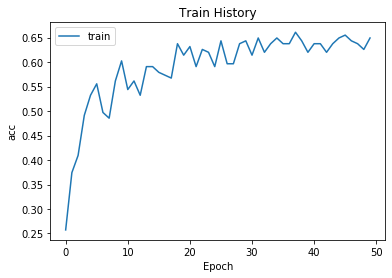

In [36]:
show_train_history(train_history,'acc')

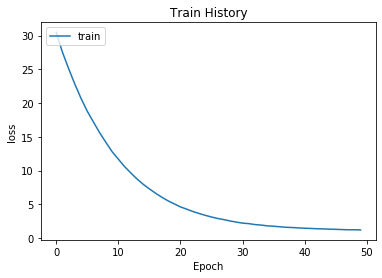

In [37]:
show_train_history(train_history,'loss')

In [38]:
test_out =  model.predict_classes(test_feature)

In [39]:
test_out

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0],
      dtype=int64)

In [40]:
prob = model.predict_proba(test_feature)

In [41]:
prob[0:10]

array([[0.5771099 , 0.21752119, 0.12676582, 0.07860316],
       [0.6294334 , 0.20601833, 0.0977992 , 0.06674911],
       [0.8001343 , 0.10165605, 0.05700364, 0.04120607],
       [0.42489073, 0.3142455 , 0.16594553, 0.09491834],
       [0.48014766, 0.26923427, 0.15723819, 0.09337991],
       [0.37614012, 0.28531873, 0.2130188 , 0.12552235],
       [0.54906106, 0.21742384, 0.14489502, 0.08862007],
       [0.7215102 , 0.13948798, 0.08243888, 0.056563  ],
       [0.5963433 , 0.20573851, 0.120824  , 0.07709428],
       [0.6664161 , 0.21692753, 0.0706354 , 0.04602101]], dtype=float32)

In [42]:
prob[10:16]

array([[0.76096576, 0.14259796, 0.05758783, 0.03884846],
       [0.21987338, 0.49546558, 0.19443724, 0.09022381],
       [0.46054074, 0.29539183, 0.15148361, 0.09258377],
       [0.7803888 , 0.11366132, 0.06419867, 0.04175121],
       [0.48983645, 0.27392524, 0.14380795, 0.09243033],
       [0.24932809, 0.44322026, 0.20558602, 0.1018656 ]], dtype=float32)

In [43]:
prob[16:]

array([[0.32158864, 0.40542558, 0.17672203, 0.0962637 ],
       [0.10040651, 0.6715376 , 0.16567443, 0.06238144],
       [0.3542837 , 0.3845463 , 0.16913944, 0.09203052],
       [0.46040657, 0.31910542, 0.13826293, 0.08222501]], dtype=float32)

In [44]:
test['HOSDAY'].values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3])

In [45]:
pd.crosstab( test['HOSDAY'].values, test_out, rownames=['Actual Species'], colnames=['Predicted Species'])

Predicted Species,0,1
Actual Species,,
0,10,0
1,4,2
2,0,3
3,1,0


In [46]:
score2 = model.evaluate(test_feature, test_y, verbose=2)
score2

[1.334974765777588, 0.6000000238418579]

In [47]:
#model.save('gggood.h5')

In [48]:
#model2 = tf.contrib.keras.models.load_model('ggg.h5')

In [49]:
#scores = model2.evaluate(test_feature, test_y, verbose=2)

In [50]:
#scores

In [51]:
#model3 = tf.contrib.keras.models.load_model('gggood.h5')

In [52]:
#scores3 = model3.evaluate(test_feature, test_y, verbose=2)

In [53]:
#scores3